In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

In [21]:
#  국립공원 기본통계 (출처: KOSIS 국가통계포털)
df = pd.read_csv('NLPRK_STA.csv', encoding='cp949')
df.head()

,공원명,육지면적,탐방객수
0,지리산,483.022,3308833
1,경주,136.550,2887634
2,계룡산,65.335,1817602
3,한려해상,127.188,6439653
4,설악산,398.237,3241484


In [22]:
fm._rebuild()
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'KoPub' in f.name] # 폰트 검색Z

[('KoPubDotum Bold',
  'C:\\Users\\JeonginKoo-Stu6\\AppData\\Local\\Microsoft\\Windows\\Fonts\\KoPubDotumBold.ttf'),
 ('KoPubDotum Medium',
  'C:\\Users\\JeonginKoo-Stu6\\AppData\\Local\\Microsoft\\Windows\\Fonts\\KoPubDotumMedium.ttf'),
 ('KoPubDotum Light',
  'C:\\Users\\JeonginKoo-Stu6\\AppData\\Local\\Microsoft\\Windows\\Fonts\\KoPubDotumLight.ttf')]

In [30]:
sns.set(style='whitegrid', font='KoPubDotum Bold', font_scale=1.2) # Seaborn 설정

In [27]:
X = df.iloc[:, [1, 2]]
m = X.shape[0] # 집합 개수
n = X.shape[1] # 특징 개수

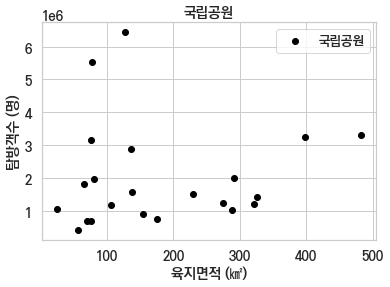

In [41]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c='black',label='국립공원')
plt.xlabel('육지면적 (㎢)')
plt.ylabel('탐방객수 (명)')
plt.legend()
plt.title('국립공원')
plt.show()

In [146]:
K = 3 # 클러스터 개수
n_iter = 100 # 반복횟수


Centroids = np.array([]).reshape(n, 0) # 클러스터 중심 초기화
Centroids

array([], shape=(2, 0), dtype=float64)

In [147]:
for i in range(K):
    rand = rd.randint(0, m-1) # 0과 21 사이 난수 생성
    Centroids = np.c_[Centroids, X.loc[rand]]
    
Centroids # 초기값 생성 완료. K = 3

array([[2.422300e+01, 2.875710e+02, 1.271880e+02],
       [1.049974e+06, 1.014793e+06, 6.439653e+06]])

In [148]:
Output = {} # 출력값 초기화

In [149]:
EuclidianDistance = np.array([]).reshape(m, 0)
EuclidianDistance

array([], shape=(22, 0), dtype=float64)

In [150]:
# 유클리드 거리 계산
Centroids[:, 0] # shape = (2,)

array([2.422300e+01, 1.049974e+06])

In [151]:
Centroids[:, :]

array([[2.422300e+01, 2.875710e+02, 1.271880e+02],
       [1.049974e+06, 1.014793e+06, 6.439653e+06]])

In [152]:
# 유클리드 거리 계산

tempDist = np.sum((X-Centroids[:, 0]) ** 2, axis= 1)
tempDist 

0     5.102444e+12
1     3.376994e+12
2     5.892527e+11
3     2.904864e+13
4     4.802716e+12
5     3.797828e+10
6     2.501365e+10
7     8.075574e+11
8     1.421841e+11
9     2.037006e+11
10    1.219023e+11
11    1.104370e+10
12    0.000000e+00
13    8.794464e+11
14    1.996780e+13
15    9.709832e+10
16    1.237772e+09
17    2.073954e+10
18    2.799627e+11
19    4.109374e+11
20    4.384019e+12
21    1.368305e+11
dtype: float64

In [153]:
np.c_[EuclidianDistance, tempDist].shape # K = 1 추가되었으므로

(22, 1)

In [154]:
# K 만큼 반복

for k in range(K):
    print(k)
    tempDist = np.sum((X-Centroids[:, k]) ** 2, axis= 1)
    EuclidianDistance = np.c_[EuclidianDistance, tempDist]
EuclidianDistance

0
1
2


array([[5.10244419e+12, 5.26261956e+12, 9.80203400e+12],
       [3.37699429e+12, 3.50753343e+12, 1.26168390e+13],
       [5.89252748e+11, 6.44502340e+11, 2.13633555e+13],
       [2.90486397e+13, 2.94291060e+13, 0.00000000e+00],
       [4.80271622e+12, 4.95815282e+12, 1.02282850e+13],
       [3.79782772e+10, 5.29280639e+10, 2.69859367e+13],
       [2.50136533e+10, 1.51231146e+10, 3.07784843e+13],
       [8.07557447e+11, 8.72025438e+11, 2.01694133e+13],
       [1.42184050e+11, 1.16890184e+11, 3.32554286e+13],
       [2.03700616e+11, 2.36694903e+11, 2.43872711e+13],
       [1.21902322e+11, 1.47706476e+11, 2.54069830e+13],
       [1.10437045e+10, 1.96757060e+10, 2.79268915e+13],
       [0.00000000e+00, 1.23777211e+09, 2.90486397e+13],
       [8.79446404e+11, 9.46668675e+11, 1.98193335e+13],
       [1.99677961e+13, 2.02834488e+13, 8.48508114e+11],
       [9.70983222e+10, 7.64107931e+10, 3.25046507e+13],
       [1.23777211e+09, 0.00000000e+00, 2.94291060e+13],
       [2.07395448e+10, 3.21101

In [155]:
EuclidianDistance.shape # k = 3 까지 각 x와 Centroids의 거리를 구한 것.

(22, 3)

In [157]:
# 이제 색인을 해야함.

np.argmin(EuclidianDistance, axis = 1)

array([0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [159]:
# K 클러스터 저장

C = np.argmin(EuclidianDistance, axis = 1)
C # shape(22, )

array([0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [176]:
Y = {} # 출력값 임시 딕셔너리

In [177]:
for k in range(K):
    Y[k+1] = np.array([]).reshape(2, 0) # 특징 개수
Y

{1: array([], shape=(2, 0), dtype=float64),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64)}

In [178]:
X.iloc[0].shape

(2,)

In [174]:
Y[C[1]+ 1] = np.c_[Y[C[1] + 1], X.loc[1]] # C[1] 키 값에 대한 재귀적 갱신
Y[C[1]+ 1]

array([[4.830220e+02, 1.365500e+02],
       [3.308833e+06, 2.887634e+06]])

In [175]:
Y

{1: array([[4.830220e+02, 1.365500e+02],
        [3.308833e+06, 2.887634e+06]]),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64)}

In [182]:
for i in range(m): # 클러스터값이 0, 1, 2 값으로 되어 있어서 +1을 하여 1, 2, 3 으로 바꾸어 준 것.
    Y[C[i]+1] = np.c_[Y[C[i]+1], X.loc[i]]
    
Y

{1: array([[4.830220e+02, 1.365500e+02, 6.533500e+01, 3.982370e+02,
         2.747660e+02, 8.070800e+01, 2.294300e+02, 3.263480e+02,
         1.055950e+02, 2.422300e+01, 2.910230e+02, 3.220110e+02,
         1.367070e+02, 7.542500e+01],
        [3.308833e+06, 2.887634e+06, 1.817602e+06, 3.241484e+06,
         1.244854e+06, 1.948616e+06, 1.501306e+06, 1.399119e+06,
         1.155063e+06, 1.049974e+06, 1.987762e+06, 1.193986e+06,
         1.579089e+06, 3.143779e+06]]),
 2: array([[1.533320e+02, 7.625600e+01, 1.756680e+02, 2.875710e+02,
         5.622000e+01, 7.005200e+01],
        [8.918170e+05, 6.729010e+05, 7.383680e+05, 1.014793e+06,
         4.089300e+05, 6.800680e+05]]),
 3: array([[1.271880e+02, 7.692200e+01],
        [6.439653e+06, 5.518508e+06]])}

In [191]:
Y[1] # 클러스터 1에 들어가 있는 좌푯값들.

array([[4.830220e+02, 1.365500e+02, 6.533500e+01, 3.982370e+02,
        2.747660e+02, 8.070800e+01, 2.294300e+02, 3.263480e+02,
        1.055950e+02, 2.422300e+01, 2.910230e+02, 3.220110e+02,
        1.367070e+02, 7.542500e+01],
       [3.308833e+06, 2.887634e+06, 1.817602e+06, 3.241484e+06,
        1.244854e+06, 1.948616e+06, 1.501306e+06, 1.399119e+06,
        1.155063e+06, 1.049974e+06, 1.987762e+06, 1.193986e+06,
        1.579089e+06, 3.143779e+06]])

In [193]:
Y[1].T # 계산의 용이함을 위해 전치행렬 변환

array([[4.830220e+02, 3.308833e+06],
       [1.365500e+02, 2.887634e+06],
       [6.533500e+01, 1.817602e+06],
       [3.982370e+02, 3.241484e+06],
       [2.747660e+02, 1.244854e+06],
       [8.070800e+01, 1.948616e+06],
       [2.294300e+02, 1.501306e+06],
       [3.263480e+02, 1.399119e+06],
       [1.055950e+02, 1.155063e+06],
       [2.422300e+01, 1.049974e+06],
       [2.910230e+02, 1.987762e+06],
       [3.220110e+02, 1.193986e+06],
       [1.367070e+02, 1.579089e+06],
       [7.542500e+01, 3.143779e+06]])

In [194]:
for k in range(K): # 0, 1, 2
    Y[k+1] = Y[k+1].T
    
Y

{1: array([[4.830220e+02, 3.308833e+06],
        [1.365500e+02, 2.887634e+06],
        [6.533500e+01, 1.817602e+06],
        [3.982370e+02, 3.241484e+06],
        [2.747660e+02, 1.244854e+06],
        [8.070800e+01, 1.948616e+06],
        [2.294300e+02, 1.501306e+06],
        [3.263480e+02, 1.399119e+06],
        [1.055950e+02, 1.155063e+06],
        [2.422300e+01, 1.049974e+06],
        [2.910230e+02, 1.987762e+06],
        [3.220110e+02, 1.193986e+06],
        [1.367070e+02, 1.579089e+06],
        [7.542500e+01, 3.143779e+06]]),
 2: array([[1.533320e+02, 8.918170e+05],
        [7.625600e+01, 6.729010e+05],
        [1.756680e+02, 7.383680e+05],
        [2.875710e+02, 1.014793e+06],
        [5.622000e+01, 4.089300e+05],
        [7.005200e+01, 6.800680e+05]]),
 3: array([[1.271880e+02, 6.439653e+06],
        [7.692200e+01, 5.518508e+06]])}

In [196]:
# 여기서 Centroids의 중점을 업데이트 함(새로 구한 좌푯값들의 평균)

for k in range(K):
    Centroids[:, k] = np.mean(Y[k+1], axis = 0)
Centroids # 좌푯값이 업데이트 됨.

array([[2.10670000e+02, 1.36516500e+02, 1.02055000e+02],
       [1.96136436e+06, 7.34479500e+05, 5.97908050e+06]])

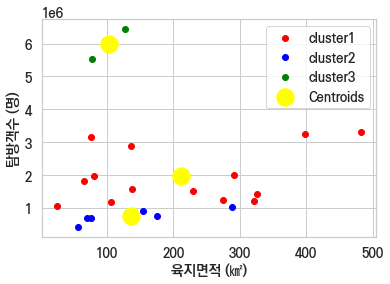

In [198]:
# K-평균 클러스터링 결과 가시화
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Y[k+1][:,0],Y[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('육지면적 (㎢)')
plt.ylabel('탐방객수 (명)')
plt.legend()
plt.show()

지금까지는 1회 한 것

이제 해왔던 것을 반복

In [206]:
for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터링 할당
    EuclidianDistance = np.array([]).reshape(m, 0)
    
    for k in range(K):
        tempDist = np.sum((X-Centroids[:, k]) **2, axis = 1) # shape = (22, )
        EuclidianDistance = np.c_[EuclidianDistance, tempDist] # shape = (22, 3)
    C = np.argmin(EuclidianDistance, axis = 1) + 1 # shape = (22, )
    
    # K 클러스터 갱신
    
    Y = {}
    
    for k in range(K):
        Y[k+1] = np.array([]).reshape(2, 0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[C[i]] = np.c_[Y[C[i]], X.loc[i]] # Y 딕셔너리 키(K 클러스터), 값(육지면적, 탐방객수) 할당
    for k in range(K):
        Y[k+1] = Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:, k] = np.mean(Y[k+1], axis = 0) # K 클러스터 중심 갱신
    Output=Y
        

In [207]:
Output

{1: array([[4.830220e+02, 3.308833e+06],
        [1.365500e+02, 2.887634e+06],
        [3.982370e+02, 3.241484e+06],
        [8.070800e+01, 1.948616e+06],
        [2.910230e+02, 1.987762e+06],
        [7.542500e+01, 3.143779e+06]]),
 2: array([[6.533500e+01, 1.817602e+06],
        [2.747660e+02, 1.244854e+06],
        [1.533320e+02, 8.918170e+05],
        [7.625600e+01, 6.729010e+05],
        [2.294300e+02, 1.501306e+06],
        [3.263480e+02, 1.399119e+06],
        [1.055950e+02, 1.155063e+06],
        [2.422300e+01, 1.049974e+06],
        [1.756680e+02, 7.383680e+05],
        [2.875710e+02, 1.014793e+06],
        [3.220110e+02, 1.193986e+06],
        [1.367070e+02, 1.579089e+06],
        [5.622000e+01, 4.089300e+05],
        [7.005200e+01, 6.800680e+05]]),
 3: array([[1.271880e+02, 6.439653e+06],
        [7.692200e+01, 5.518508e+06]])}

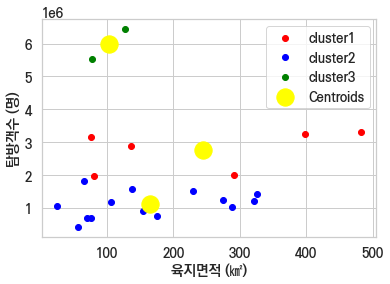

In [208]:
# K-평균 클러스터링 결과 가시화
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Y[k+1][:,0],Y[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('육지면적 (㎢)')
plt.ylabel('탐방객수 (명)')
plt.legend()
plt.show()